## Vincent T. Cooper

- Loads final outputs (pre bcgen) and inspects how using 
  the Ice 6G_C at 21k (Pettier et al, 
  https://www.atmosp.physics.utoronto.ca/~peltier/data.php) mask
- Will need to run bcgen utility again on the adjusted dataset 
  because the new SIC values will also affect the SSTs

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import pandas as pd
import seaborn as sns
import warnings
    
mpl.rcParams['figure.figsize'] = 8, 4
mpl.rcParams['font.size'] = 12

cmap_nan = copy.copy(plt.cm.bwr)
cmap_nan.set_bad('k')


In [5]:
# latlongrid = xr.open_dataset('/home/disk/atmos/vcooper/work/ref/sithick_SImon_CESM2_piControl_r1i1p1f1_gn_110001-120012.nc')
grid = xr.open_dataset('/home/disk/atmos/vcooper/work/ref/cicefsdww3i.cice.h1.0086.nc').tarea

## Load Data

In [6]:
##### Load original data from U Arizona team for reference only #####

## Load LGM output
ddir = '/home/disk/atmos/vcooper/work/p2c2/lgm/'
dfile = 'lgmDA_hol_SST_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).sst,
                   tempds.set_coords(['lat','lon','month']).sst_std])
holo_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_sst_climo['mask'] = xr.where(~np.isnan(holo_sst_climo.sst.isel(nmonth=0)), 1, 0)

dfile = 'lgmDA_lgm_SST_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).sst,
                   tempds.set_coords(['lat','lon','month']).sst_std])
lgm_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_sst_climo['mask'] = xr.where(~np.isnan(lgm_sst_climo.sst.isel(nmonth=0)), 1, 0)

## Load ICEFRAC
dfile = 'lgmDA_hol_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
holo_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_ice_climo['mask'] = xr.where(~np.isnan(holo_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

dfile = 'lgmDA_lgm_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
lgm_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_ice_climo['mask'] = xr.where(~np.isnan(lgm_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

The UW-infilled files before bcgen from prep_cam_bc. Then the files copied over from cheyenne after having run bcgen.

In [24]:
#############
# THIS VERSION ALREADY WENT THROUGH HURRELL ADJUSTMENTS.
# I am not using it, just here for reference. It is old.
# fpath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
# lgm_before_bcgen = xr.open_dataset(fpath + 'lgm_bc_final_prediddle.nc')

# savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
# fname = 'holo_bc_final_prediddle.nc'

#############
# THIS VERSION HAS NOT GONE THROUGH HURRELL ADJUSTMENTS
# SO IT IS CONSISTENT WITH Infilling>IceSheet>Meridian>Hurrell>BCGEN
path = '/home/disk/sipn/vcooper/nobackup/lgm/infilled/'
lgm_ice_merged = xr.open_dataset(
    path + 'lgmDA_lgm_ICEFRAC_monthly_climo_merged_v2.nc').set_coords(['lat','lon'])
lgm_sst_merged = xr.open_dataset(path + 
                                     'lgmDA_lgm_SST_monthly_climo_merged.nc')

In [8]:
## cam bc bcgen post diddle
holo_cambc = xr.open_dataset('/home/disk/atmos/vcooper/nobackup/lgm/cam_sst/holo_sstice_clim.nc')
lgm_cambc = xr.open_dataset('/home/disk/atmos/vcooper/nobackup/lgm/cam_sst/lgm_sstice_clim.nc')

Now load the Ice 6G_C 21k LGM data

In [9]:
ice6g = xr.open_dataset('/home/disk/sipn/vcooper/nobackup/lgm/peltier_lgm-mask/' + 'I6_C.VM5a_1deg.21.nc')

## Infilled data

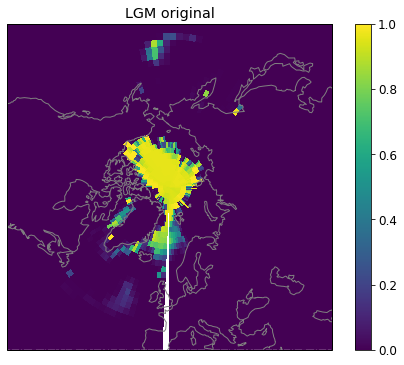

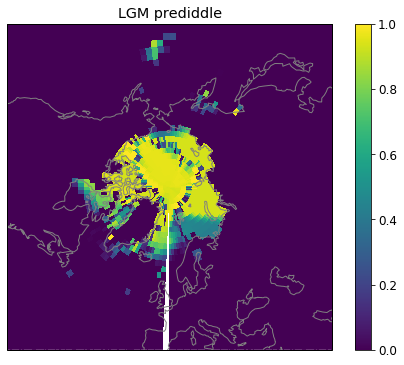

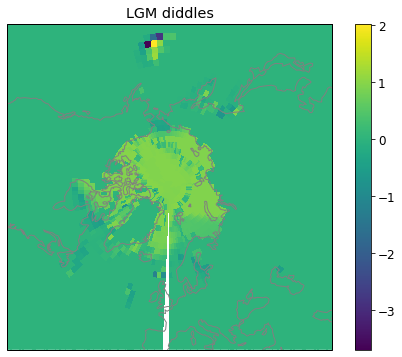

In [20]:
## before infilling
isel_m = 6
ds = lgm_ice_climo.icefrac[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM original')
plt.show()

## before bcgen

ds = lgm_cambc.ice_cov_prediddle[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM prediddle')
plt.show()

## after bcgen

ds = lgm_cambc.ice_cov[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM diddles')
plt.show()

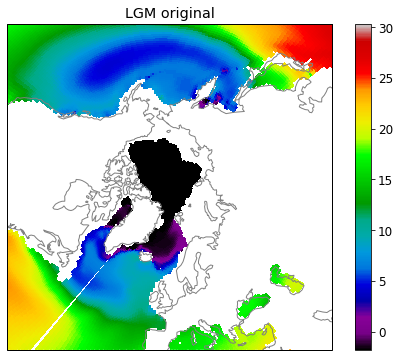

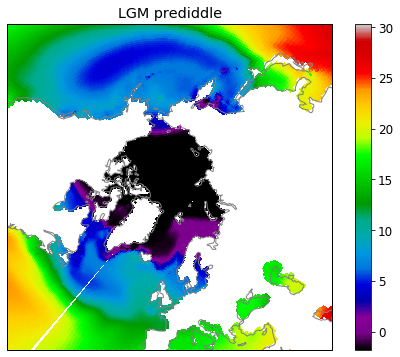

In [33]:
## before infilling
isel_m = 6
ds = lgm_sst_climo.sst[isel_m]
cmap_set = 'nipy_spectral'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM original')
plt.show()

## before bcgen

ds = lgm_sst_merged.sst[isel_m]
# cmap_set = 'jet'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM prediddle')
plt.show()

## after bcgen

# ds = lgm_cambc.ice_cov[isel_m]
# cmap_set = 'viridis'

# ## Arctic
# proj = ccrs.NorthPolarStereo()

# fig = plt.subplots(figsize=(8,6))
# ax = plt.subplot(projection=proj)
# ax.coastlines(color='0.5')
# ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
# plt.pcolormesh(ds.lon,ds.lat,ds,
#                transform=ccrs.PlateCarree(),#vmin=-1.8,
#                cmap=cmap_set,alpha=1)
# plt.colorbar()
# plt.title('LGM diddles')
# plt.show()

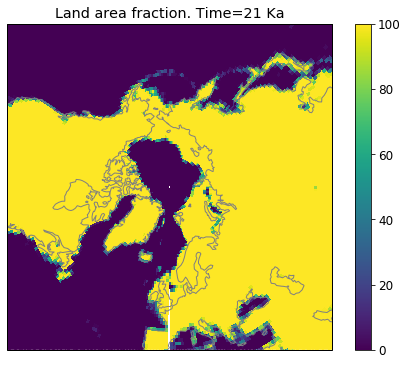

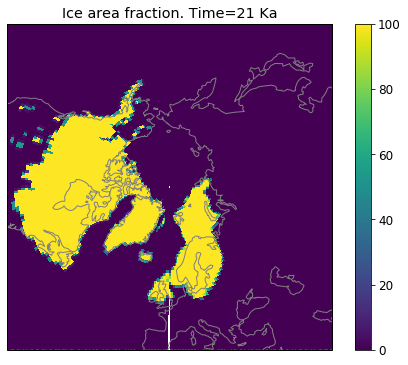

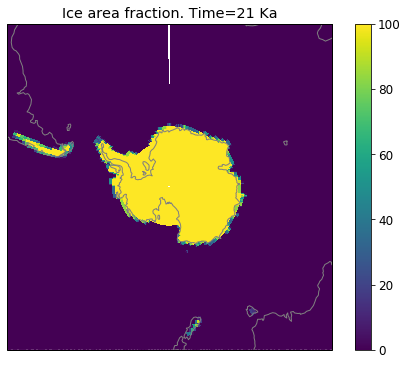

In [79]:
## land area

ds = ice6g.sftlf
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title(ds.long_name)
plt.show()

## ice area
ds = ice6g.sftgif
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 38, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title(ds.long_name)
plt.show()

## ice area
ds = ice6g.sftgif
cmap_set = 'viridis'

## Southern Hemi
proj = ccrs.SouthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, -38, -90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title(ds.long_name)
plt.show()

## Regrid the ice area onto the cam grid

In [12]:
%%time
## SST (icefrac is already on 1.9x2.5 grid)
# amip2000['mask'] = xr.where(~np.isnan(amip2000.SST_cpl[0]),1,0) ## dummy mask
newgrid = lgm_cambc.ice_cov_prediddle[0] # desired grid
data_for_regridding = ice6g
data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding.sftlf),1,0)

regridder = xe.Regridder(data_for_regridding, newgrid,
                         method='bilinear',
                         periodic=True,
#                          extrap_method='inverse_dist',extrap_num_src_pnts=64,
#                          filename='bilinear_lgm_to_holo_per_extrapID64.nc',
                         reuse_weights=False)

ice6g_regrid = regridder(data_for_regridding)

# regridder

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


CPU times: user 1.83 s, sys: 74.5 ms, total: 1.91 s
Wall time: 1.94 s


/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/frontend.py:567: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


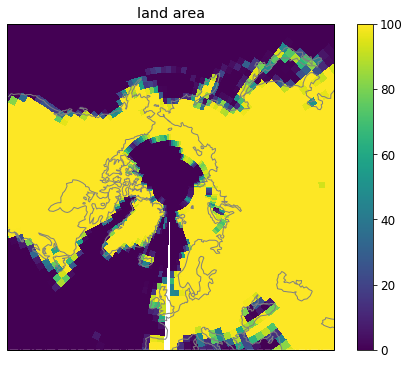

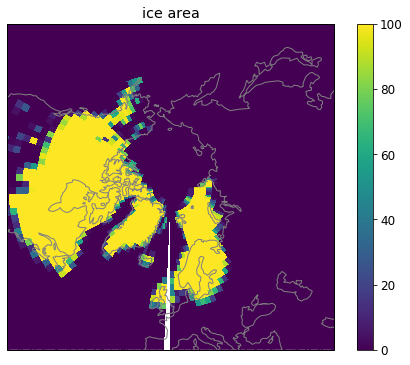

In [13]:
## land area

ds = ice6g_regrid.sftlf
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('land area')
plt.show()

## ice area
ds = ice6g_regrid.sftgif
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('ice area')
plt.show()

## Adjusted infilled dataset for ice sheets
set minimum sea ice fraction to be the ice area fraction from ice6g

In [14]:
## that already did the Hurrell adjustments
# cambc_ice6g_adj = xr.where(lgm_cambc.ice_cov_prediddle*100 < ice6g_regrid.sftgif, 
#                            ice6g_regrid.sftgif/100, lgm_cambc.ice_cov_prediddle)

## version that still needs the Hurrell adjustments
cambc_ice6g_adj = xr.where(lgm_ice_merged.icefrac*100 < ice6g_regrid.sftgif.values, 
                           ice6g_regrid.sftgif.values/100, lgm_ice_merged.icefrac)

# Comparison before and after

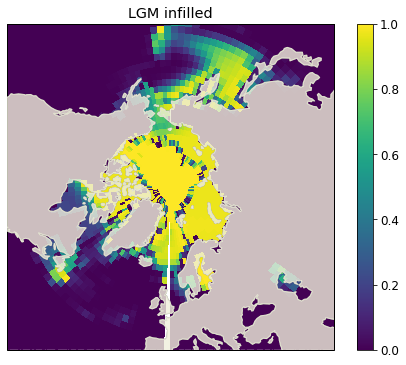

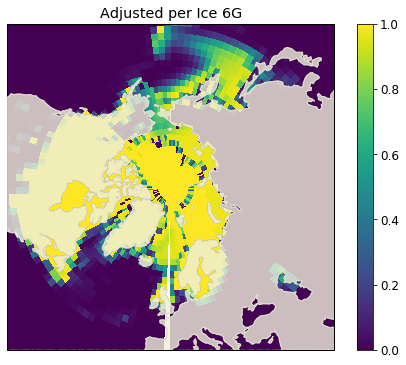

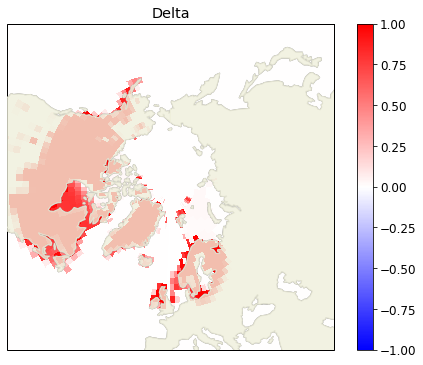

In [15]:
## before bcgen
isel_m = 2

ds = lgm_ice_merged.icefrac[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('LGM infilled')
plt.show()


## adjusted per ice6g

ds = cambc_ice6g_adj[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('Adjusted per Ice 6G')
plt.show()


## Delta

ds = cambc_ice6g_adj[isel_m] - lgm_ice_merged.icefrac[isel_m]
cmap_set = 'bwr'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,vmin=-1,vmax=1,alpha=1)
plt.colorbar()
plt.title('Delta')
plt.show()

## Adjust along meridians to eliminate oddities from mask issues

In [17]:
cambc_ice6g_adjmer = copy.deepcopy(cambc_ice6g_adj)
latmin = 68

In [18]:
%%time
for it in range(12):
    for imer,val in enumerate(cambc_ice6g_adj[it].transpose('nLon',...)):
        valnh = val.where(val.lat > latmin)
    
        ## check maximum ice poleward and equatorward, along meridian
        max_ice_poleward = np.array([valnh[j:].max() for j in range(len(valnh))])
        max_ice_equatorward = np.array([valnh[0:j+1].max() for j in range(len(valnh))])

        ## ice ceiling is maximum value ice will increase to. don't go below the original
        ## ice value, and don't go above the maximum SIC poleward of position
        ice_ceiling = np.array([np.max([p,v]) for p,v in zip(max_ice_poleward,valnh)])
        max_ice_equatorward = np.where((max_ice_equatorward > valnh) & (max_ice_equatorward > ice_ceiling), 
                                   ice_ceiling, max_ice_equatorward)

        val = xr.where(val.lat > latmin, max_ice_equatorward, val)
        cambc_ice6g_adjmer[it,:,imer] = val

CPU times: user 1min 32s, sys: 0 ns, total: 1min 32s
Wall time: 1min 32s


In [219]:
## testing ground
# it = 7
# pole_icemin = cambc_ice6g_adj[it].where(val.lat > 85).min().values
# for imer,val in enumerate(cambc_ice6g_adj[it].transpose('nLon',...)):
#     valnh = val.where(val.lat > latmin)
    
#     ## check maximum ice poleward and equatorward, along meridian
#     max_ice_poleward = np.array([valnh[j:].max() for j in range(len(valnh))])
#     max_ice_equatorward = np.array([valnh[0:j+1].max() for j in range(len(valnh))])
    
#     ## ice ceiling is maximum value ice will increase to. don't go below the original
#     ## ice value, and don't go above the maximum SIC poleward of position
#     ice_ceiling = np.array([np.max([p,v]) for p,v in zip(max_ice_poleward,valnh)])
#     max_ice_equatorward = np.where((max_ice_equatorward > valnh) & (max_ice_equatorward > ice_ceiling), 
#                                ice_ceiling, max_ice_equatorward)
    
#     val = xr.where(val.lat > latmin, max_ice_equatorward, val)
#     cambc_ice6g_adjmer[it,:,imer] = val

In [89]:
# max_ice_equatorward = np.zeros(nds[:,100].shape)
# max_ice_equatorward = [nds[0:j+1,100].values.max() for j in range(len(max_ice_equatorward))]
# max_ice_equatorward = np.array(max_ice_equatorward)

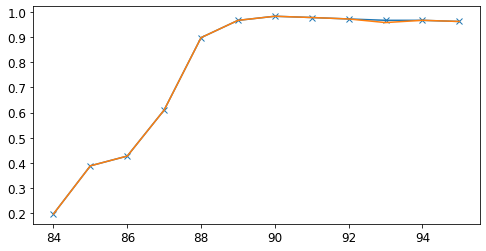

In [220]:
plt.plot(max_ice_equatorward,marker='x')
plt.plot(valnh)
plt.show()

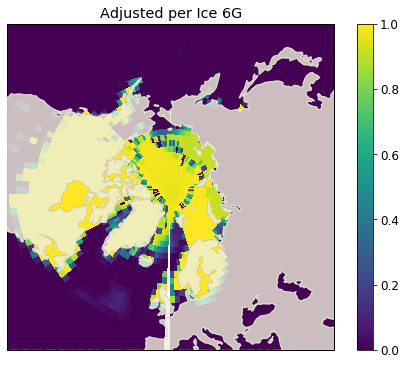

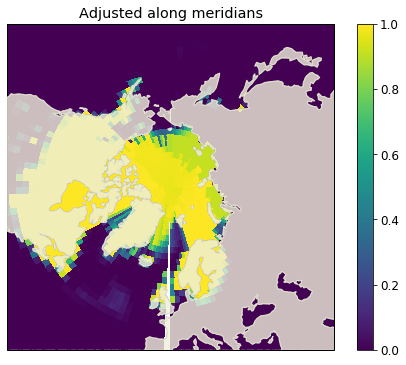

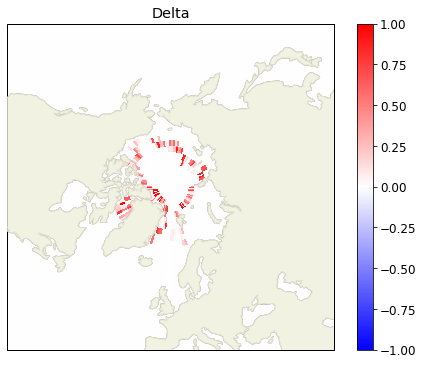

In [84]:
## before bcgen
isel_m = 7

ds = cambc_ice6g_adj[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('Adjusted per Ice 6G')
plt.show()


## adjusted per ice6g

ds = cambc_ice6g_adjmer[isel_m]
cmap_set = 'viridis'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,alpha=1)
plt.colorbar()
plt.title('Adjusted along meridians')
plt.show()


## Delta

ds = cambc_ice6g_adjmer[isel_m] - cambc_ice6g_adj[isel_m]
cmap_set = 'bwr'

## Arctic
proj = ccrs.NorthPolarStereo()

fig = plt.subplots(figsize=(8,6))
ax = plt.subplot(projection=proj)
ax.coastlines(color='0.5')
ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.pcolormesh(ds.lon,ds.lat,ds,
               transform=ccrs.PlateCarree(),#vmin=-1.8,
               cmap=cmap_set,vmin=-1,vmax=1,alpha=1)
plt.colorbar()
plt.title('Delta')
plt.show()

All 12 months results from this adjustment along meridians

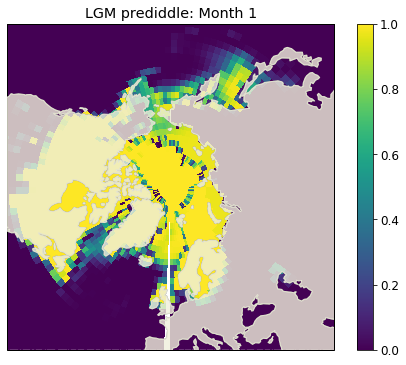

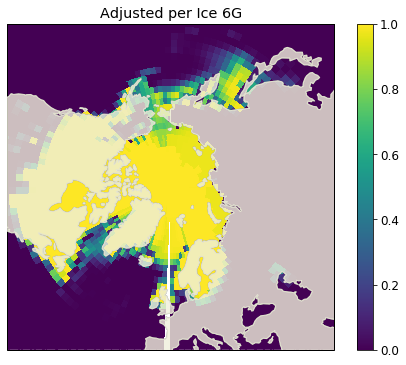

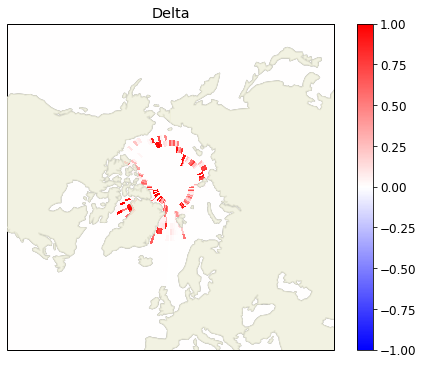

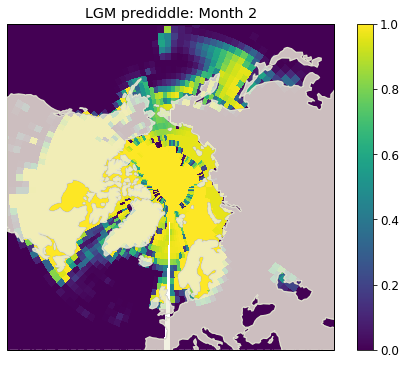

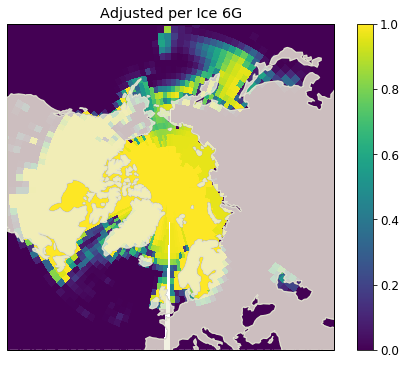

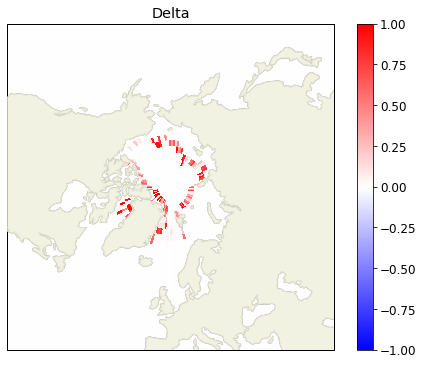

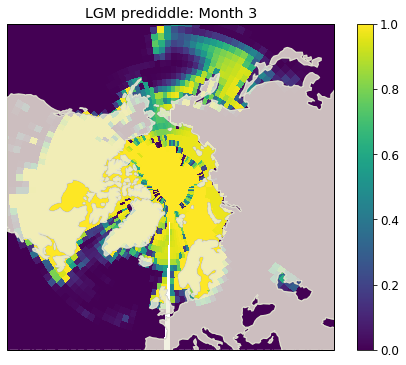

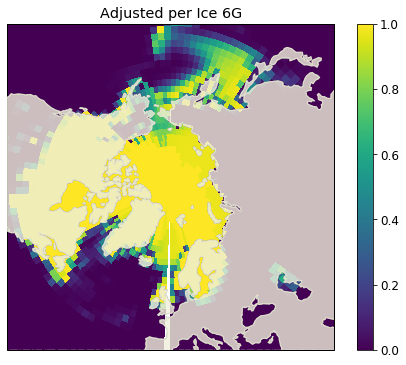

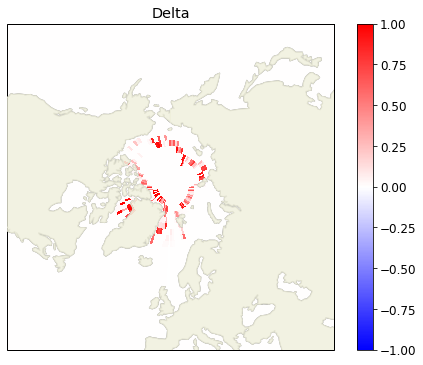

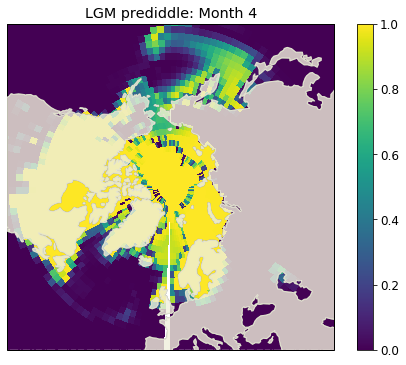

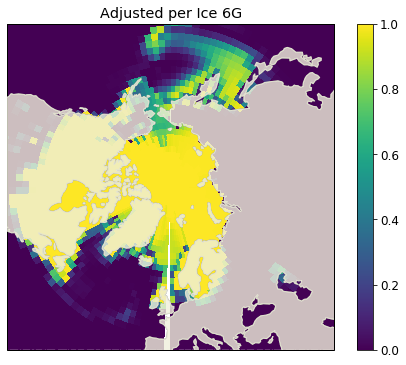

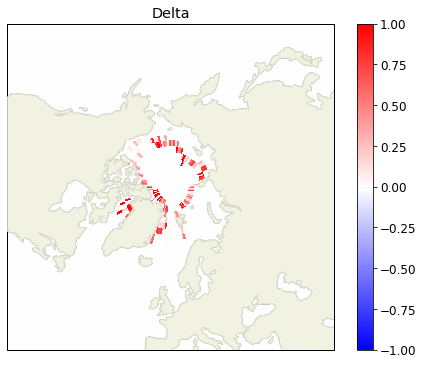

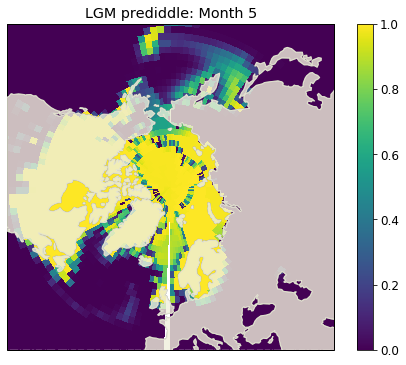

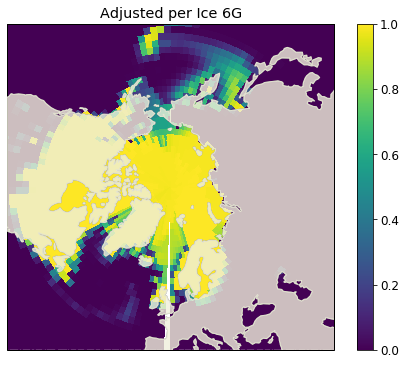

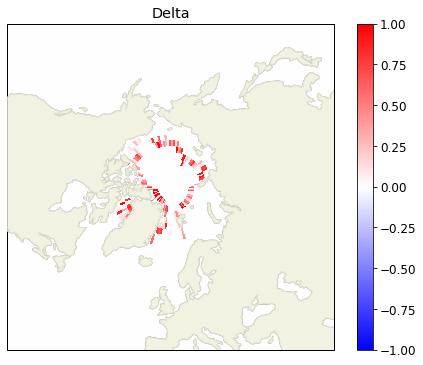

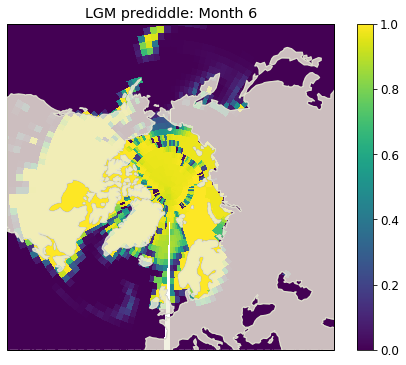

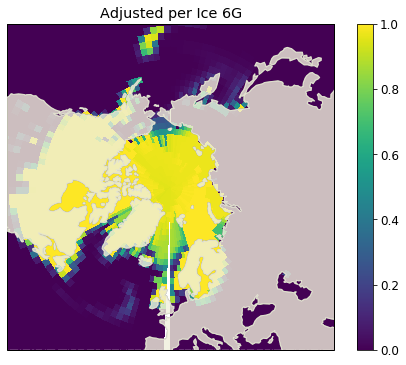

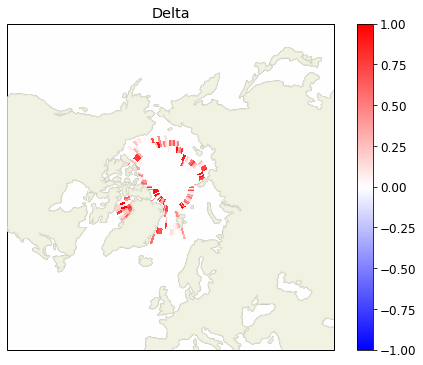

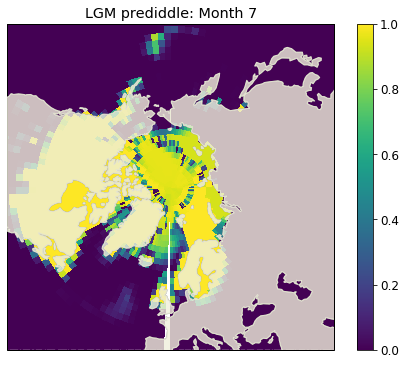

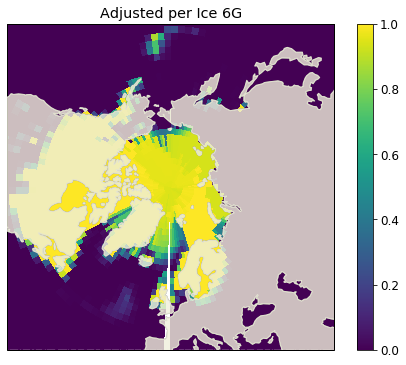

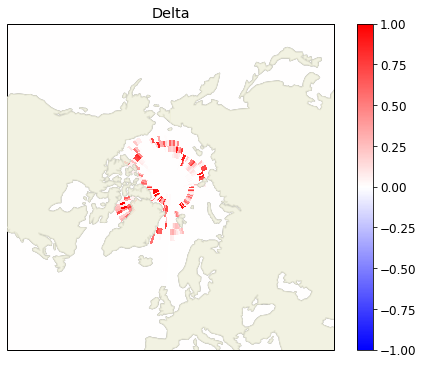

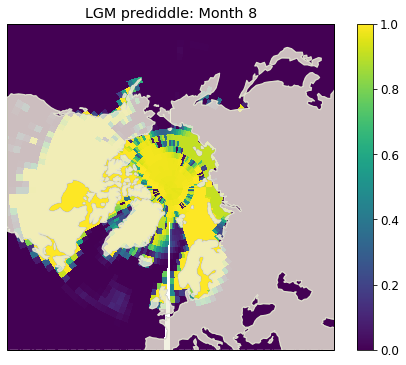

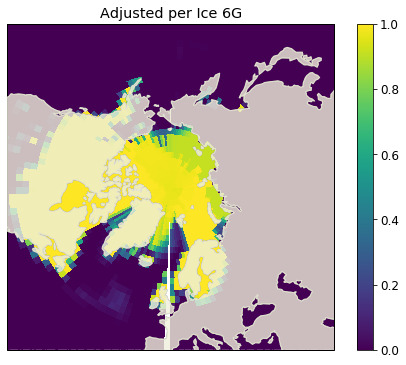

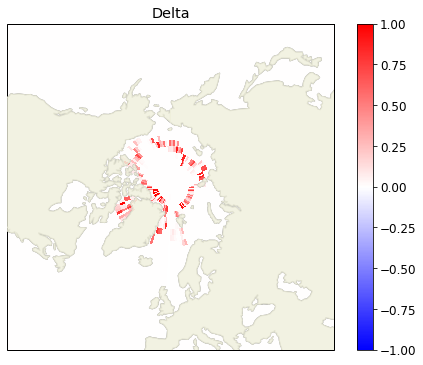

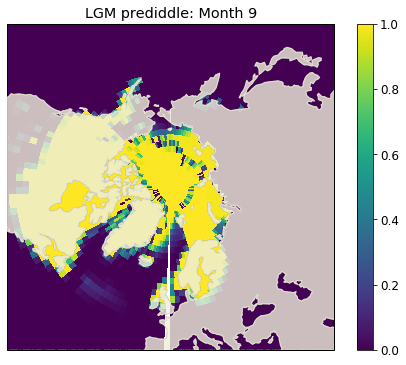

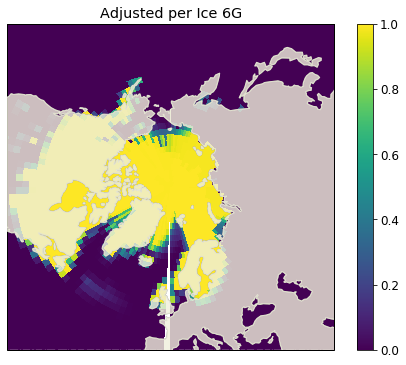

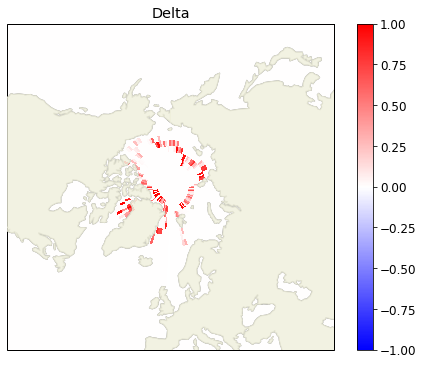

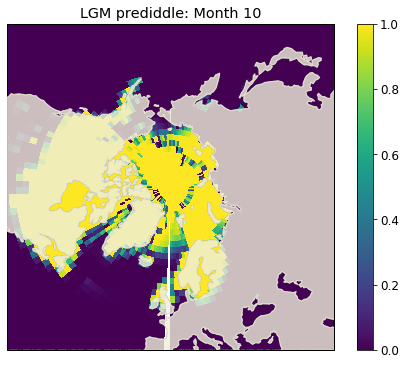

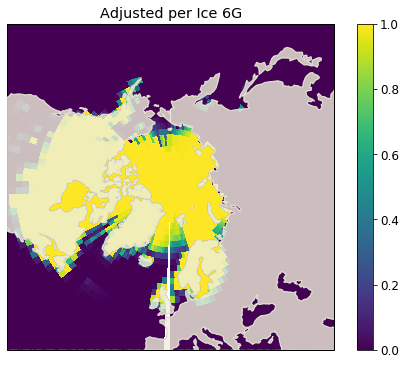

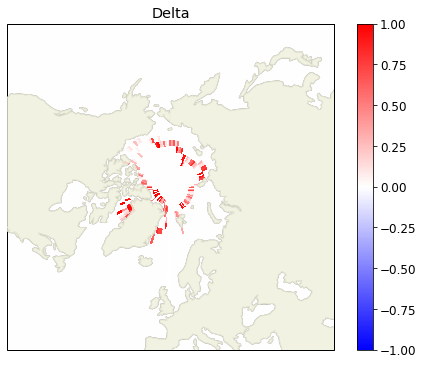

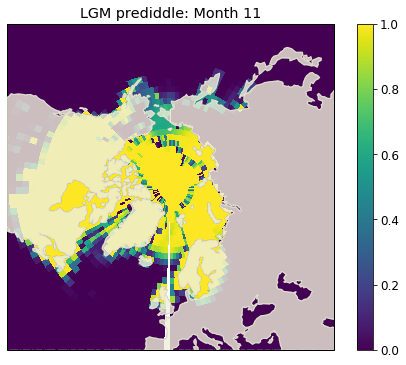

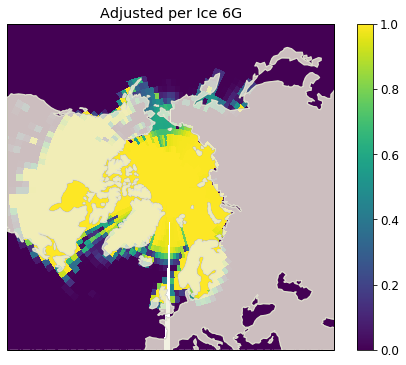

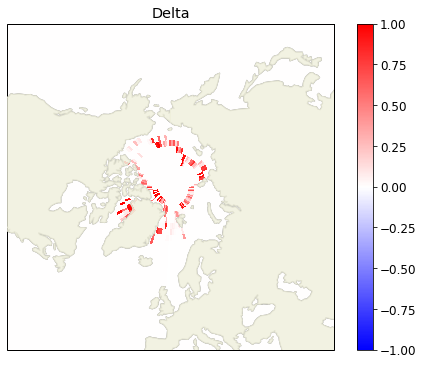

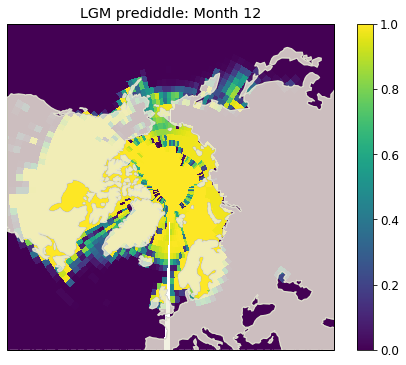

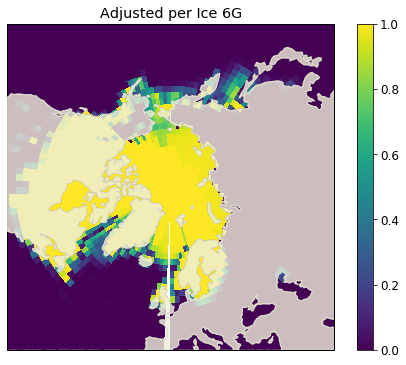

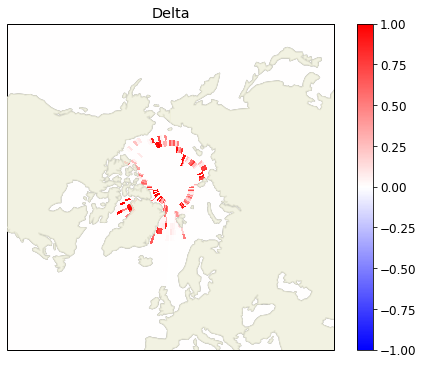

In [19]:
## before bcgen
for isel_m in range(12):

    ds = cambc_ice6g_adj[isel_m]
    cmap_set = 'viridis'

    ## Arctic
    proj = ccrs.NorthPolarStereo()

    fig = plt.subplots(figsize=(8,6))
    ax = plt.subplot(projection=proj)
    ax.coastlines(color='0.5')
    ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
    plt.pcolormesh(ds.lon,ds.lat,ds,
                   transform=ccrs.PlateCarree(),#vmin=-1.8,
                   cmap=cmap_set,alpha=1)
    plt.colorbar()
    plt.title('LGM prediddle: Month ' + str(isel_m+1))
    plt.show()


    ## adjusted per ice6g

    ds = cambc_ice6g_adjmer[isel_m]
    cmap_set = 'viridis'

    ## Arctic
    proj = ccrs.NorthPolarStereo()

    fig = plt.subplots(figsize=(8,6))
    ax = plt.subplot(projection=proj)
    ax.coastlines(color='0.5')
    ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
    plt.pcolormesh(ds.lon,ds.lat,ds,
                   transform=ccrs.PlateCarree(),#vmin=-1.8,
                   cmap=cmap_set,alpha=1)
    plt.colorbar()
    plt.title('Adjusted per Ice 6G')
    plt.show()


    ## Delta

    ds = cambc_ice6g_adjmer[isel_m] - cambc_ice6g_adj[isel_m]
    cmap_set = 'bwr'

    ## Arctic
    proj = ccrs.NorthPolarStereo()

    fig = plt.subplots(figsize=(8,6))
    ax = plt.subplot(projection=proj)
    ax.coastlines(color='0.5')
    ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
    plt.pcolormesh(ds.lon,ds.lat,ds,
                   transform=ccrs.PlateCarree(),#vmin=-1.8,
                   cmap=cmap_set,vmin=-1,vmax=1,alpha=1)
    plt.colorbar()
    plt.title('Delta')
    plt.show()

## Check seasonality

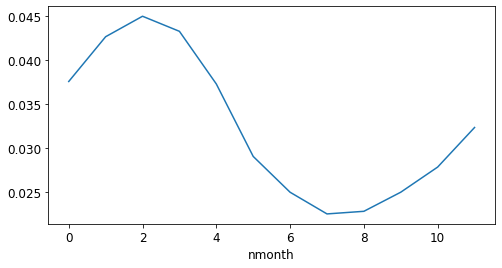

In [62]:
coswts = np.cos(np.deg2rad(lgm_ice_climo.lat.where(lgm_ice_climo.lat > 0)))
# plt.plot(coswts)

(lgm_ice_climo.icefrac.where(lgm_ice_climo.lat > 0).mean(dim='nLon') * coswts/np.sum(coswts)).sum(dim='nLat').plot()

In [69]:
# cambc_ice6g_adjmer
lgm_ice_merged

cambc_ice6g_adjmer = xr.where(cambc_ice6g_adjmer > 1, 1, cambc_ice6g_adjmer)
cambc_ice6g_adjmer = xr.where(cambc_ice6g_adjmer < 0, 0, cambc_ice6g_adjmer)

In [76]:
cambc_ice6g_adjmer.max()

<xarray.DataArray 'icefrac' ()>
array(1.)

In [78]:
%%time
path = '/home/disk/sipn/vcooper/nobackup/lgm/infilled/'
cambc_ice6g_adjmer.rename('icefrac').to_netcdf(path + 'lgmDA_lgm_ICEFRAC_monthly_climo_merged_v3.nc')

CPU times: user 15.7 ms, sys: 116 µs, total: 15.8 ms
Wall time: 94.2 ms


In [77]:
!rm /home/disk/sipn/vcooper/nobackup/lgm/infilled/lgmDA_lgm_ICEFRAC_monthly_climo_merged_v3.nc